# Exploratory Data Analysis of the Titanic Dataset

In this project, I will perform exploratory data analysis on the famous Titanic dataset to gain insights into the passengers who were onboard the ill-fated ship. The dataset contains information on the passengers, such as their age, gender, ticket class, and whether or not they survived the disaster.

Data Source: The Titanic dataset can be downloaded from Kaggle at https://www.kaggle.com/c/titanic/data

Step 1: Import the dataset and load it into a pandas DataFrame

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset into a pandas DataFrame
df = pd.read_csv('train.csv')

Step 2: Clean and preprocess the data

In [4]:
# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Convert categorical variables into numerical ones
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Step 3: Explore the data

         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.352413   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    0.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    0.361392  
std     49.693429    0.635673  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329

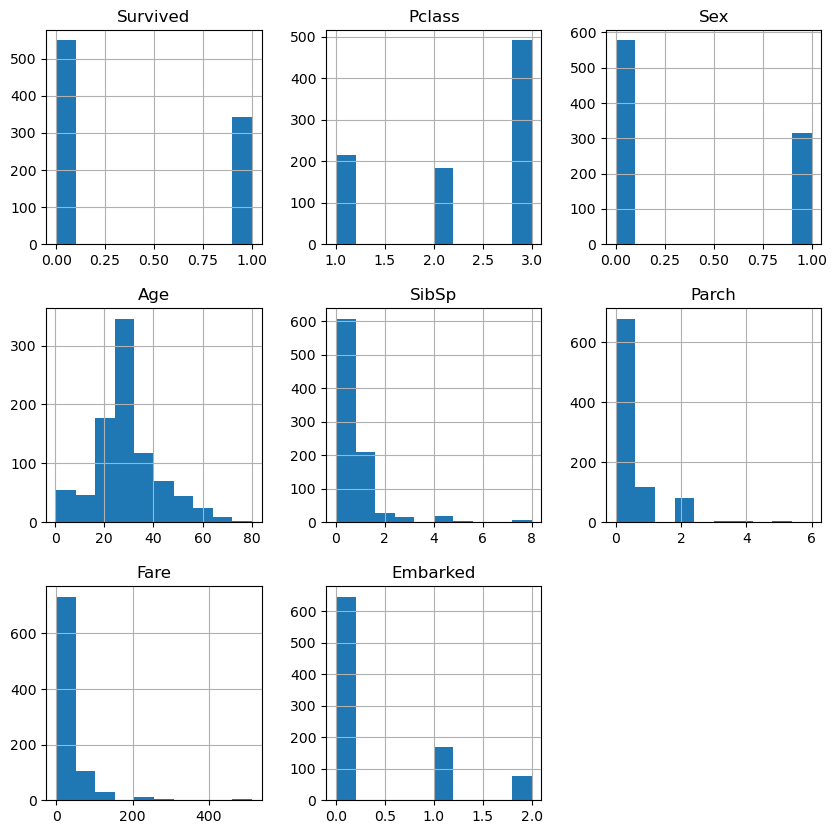

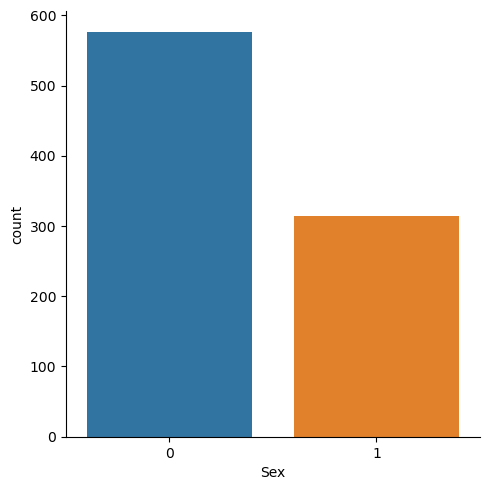

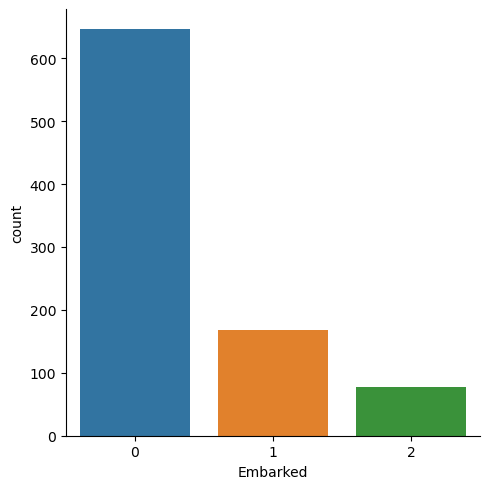

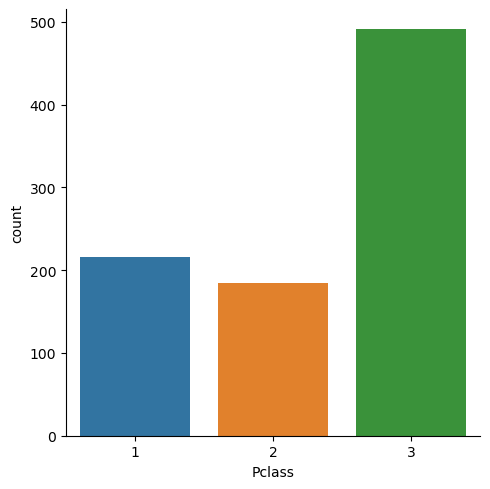

In [5]:
# Calculate summary statistics
print(df.describe())

# Plot histograms of numeric variables
df.hist(figsize=(10,10))
plt.show()

# Plot bar charts of categorical variables
sns.catplot(x='Sex', kind='count', data=df)
sns.catplot(x='Embarked', kind='count', data=df)
sns.catplot(x='Pclass', kind='count', data=df)
plt.show()

Step 4: Feature engineering

In [6]:
# Create a new feature called FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create a new feature called IsAlone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Create a new feature called AgeGroup
bins = [0, 12, 18, 25, 35, 60, np.inf]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create a new feature called FareGroup
bins = [-np.inf, 7.91, 14.45, 31, np.inf]
labels = ['Low', 'Medium', 'High', 'Very high']
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels)

Step 5: Model building and evaluation

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree classifier to the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print('Accuracy Score:', acc_score)
print('Confusion Matrix:', conf_matrix)

Accuracy Score: 0.7877094972067039
Confusion Matrix: [[86 19]
 [19 55]]


Step 6: Communicate results

    The sinking of the Titanic is one of the most infamous shipwrecks in history. In this report, I analysed data on the passengers aboard the Titanic to determine which factors were most closely associated with survival and built an approximately 79% accurate predictive model for it using a decision tree classifier. This model could be used to inform emergency response protocols in the event of a shipwreck - by identifying the factors that are most closely associated with survival, emergency responders can prioritise their efforts and resources to maximize the chances of rescue for those most at risk.
